Integrantes:


Ariel Cadena: cpuruncajas@flacso.edu.ec/Ariel98-lab


Lenin Loyola: lloyolafl@flacso.edu.ec/leninloyolavinces


Google Colab: https://colab.research.google.com/drive/10NEq7c-dH3tjIFN03-T-4877jskhW3eM?usp=sharing


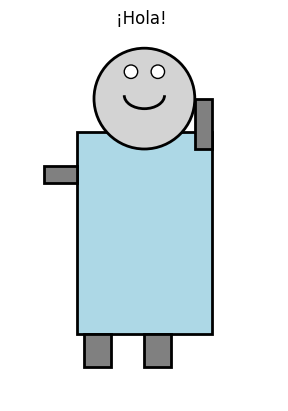

Soy un software creado para ayudarte a resolver ecuaciones diferenciales.
Sigue las instrucciones para que pueda ayudarte.
UNICAMENTE SE ACEPTAN MATRICES 2x2 por el momento...
Ingresa la matriz 2x2 fila por fila, (EJEMPLO: 1 espacio 2):


In [ ]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Crear la figura
fig, ax = plt.subplots()

# Dibujar el cuerpo del robot (rectángulo)
body = patches.Rectangle((1, 1), 4, 6, edgecolor="black", facecolor="lightblue", linewidth=2)
ax.add_patch(body)

# Dibujar la cabeza (círculo)
head = patches.Circle((3, 8), 1.5, edgecolor="black", facecolor="lightgray", linewidth=2)
ax.add_patch(head)

# Dibujar los ojos (círculos)
eye1 = patches.Circle((2.6, 8.8), 0.2, edgecolor="black", facecolor="white")
eye2 = patches.Circle((3.4, 8.8), 0.2, edgecolor="black", facecolor="white")
ax.add_patch(eye1)
ax.add_patch(eye2)

# Dibujar la sonrisa (arco curvado hacia arriba)
smile = patches.Arc((3, 8.1), 1.2, 0.8, angle=0, theta1=180, theta2=360, edgecolor="black", linewidth=2)
ax.add_patch(smile)

# Dibujar los brazos (uno saludando levantado y otro abajo)
arm1 = patches.Rectangle((0, 5.5), 1, 0.5, edgecolor="black", facecolor="gray", linewidth=2)  # Brazo abajo
arm2 = patches.Rectangle((4.5, 6.5), 0.5, 1.5, edgecolor="black", facecolor="gray", linewidth=2)  # Brazo levantado
ax.add_patch(arm1)
ax.add_patch(arm2)

# Dibujar las piernas (rectángulos)
leg1 = patches.Rectangle((1.2, 0), 0.8, 1, edgecolor="black", facecolor="gray", linewidth=2)
leg2 = patches.Rectangle((3.0, 0), 0.8, 1, edgecolor="black", facecolor="gray", linewidth=2)
ax.add_patch(leg1)
ax.add_patch(leg2)

# Ajustar los límites y la proporción
ax.set_xlim(-1, 7)
ax.set_ylim(-1, 10)
ax.set_aspect("equal")
ax.axis("off")

# Mostrar la gráfica
plt.title("¡Hola! ")
plt.show()

def sistema_ecuaciones_diferenciales():
    # Saludo inicial
    print("Soy un software creado para ayudarte a resolver ecuaciones diferenciales.")
    print("Sigue las instrucciones para que pueda ayudarte.")

    # Crear la matriz A 2x2
    print("UNICAMENTE SE ACEPTAN MATRICES 2x2 por el momento")
    A = []
    print("Ingresa la matriz 2x2 fila por fila, separando los números con espacios:")
    for i in range(2):
        fila = list(map(float, input("Ejemplo: 1 espacio 2\n").split()))
        A.append(fila)
    A = np.array(A)

    # Definir vector de variables simbólicas
    X = np.array([sp.symbols('x0'), sp.symbols('x1')])
    A_sym = sp.Matrix(A)
    sistema = A_sym * X

    print("\nSistema de ecuaciones diferenciales:")
    for i in range(2):
        print(f"dx{i}/dt = {sistema[i]}")

    # Cálculo de los valores propios y los vectores propios
    valores_propios, vectores_propios = np.linalg.eig(A)

    # Mostrar los valores propios
    print("\nValores propios:", valores_propios)

    # Clasificación de los valores propios
    if np.all(np.isreal(valores_propios)):
        multiplicidades = [list(valores_propios).count(l) for l in valores_propios]
        if all(m == 1 for m in multiplicidades):
            print("Los valores propios son reales y distintos. La solución general es:")
            print(solucion_general_reales(A, valores_propios, vectores_propios))
            graficar_solucion(A)
            graficar_diagrama_fase(A, valores_propios, vectores_propios)
        else:
            print("Los valores propios tienen multiplicidad. Forma de Jordan:")
            print(solucion_jordan(A, valores_propios, vectores_propios))
            graficar_solucion(A)
            graficar_diagrama_fase(A, valores_propios, vectores_propios)
    else:
        print("Los valores propios son complejos. La solución general es:")
        print(solucion_compleja(A, valores_propios, vectores_propios))
        graficar_solucion(A)
        graficar_diagrama_fase(A, valores_propios, vectores_propios)

def solucion_general_reales(A, valores_propios, vectores_propios):
    t = sp.Symbol('t')
    solucion = []
    for i in range(len(valores_propios)):
        vi = vectores_propios[:, i]
        solucion.append(sp.exp(valores_propios[i] * t) * vi)

    # Mostrar la solución en la consola
    for i, sol in enumerate(solucion):
        print(f"Solución {i+1}: {sol}")

    return solucion

def solucion_jordan(A, valores_propios, vectores_propios):
    A_sym = sp.Matrix(A)
    J, P = A_sym.jordan_form()  # Forma de Jordan
    return f"Forma de Jordan: \n{J}\n\nMatriz de cambio de base P: \n{P}"

def solucion_compleja(A, valores_propios, vectores_propios):
    t = sp.Symbol('t')
    solucion = []
    for i, valor in enumerate(valores_propios):
        if np.iscomplex(valor):
            alpha = np.real(valor)
            beta = np.imag(valor)
            solucion.append(
                sp.exp(alpha * t) * (
                    sp.cos(beta * t) * vectores_propios[:, i] + sp.sin(beta * t) * vectores_propios[:, i]
                )
            )

    return solucion

def sistema_diferencial(t, X, A):
    return A @ X

def graficar_solucion(A):
    t_span = (0, 10)
    t_eval = np.linspace(*t_span, 100)
    X0 = np.ones(A.shape[0])  # Condición inicial (vector de unos)

    solucion = solve_ivp(sistema_diferencial, t_span, X0, t_eval=t_eval, args=(A,))

    # Crear una figura con dos subgráficas
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

    ax1.plot(solucion.t, solucion.y[0], label=f'x0(t)', color='b')
    ax1.set_title("Solución de x0(t)")
    ax1.set_xlabel("t")
    ax1.set_ylabel("x0(t)")
    ax1.grid(True)
    ax1.legend()

    if A.shape[0] > 1:
        ax2.plot(solucion.t, solucion.y[1], label=f'x1(t)', color='r')
        ax2.set_title("Solución de x1(t)")
        ax2.set_xlabel("t")
        ax2.set_ylabel("x1(t)")
        ax2.grid(True)
        ax2.legend()

    plt.tight_layout()
    plt.show()

def sistema_ecuaciones_diferenciales():
    # Saludo inicial
    print("Soy un software creado para ayudarte a resolver ecuaciones diferenciales.")
    print("Sigue las instrucciones para que pueda ayudarte.")

    # Crear la matriz A 2x2
    print("UNICAMENTE SE ACEPTAN MATRICES 2x2 por el momento...")
    A = []
    print("Ingresa la matriz 2x2 fila por fila, (EJEMPLO: 1 espacio 2):")
     # Restricción para asegurarse que la matriz es 2x2
    for i in range(2):
        while True:
            try:
                fila = list(map(float, input(f"Fila {i+1}: ").split()))
                if len(fila) != 2:
                    print("¡Error! Debes ingresar exactamente 2 números por fila.")
                else:
                    A.append(fila)
                    break
            except ValueError:
                print("¡Error! EJEMPLO: 1 espacio 2.")
    A = np.array(A)

    # Definir vector de variables simbólicas
    x0, x1 = sp.symbols('x0 x1')
    X = sp.Matrix([x0, x1])  # Definimos X como un vector simbólico

    # Convertir A a matriz simbólica de sympy
    A_sym = sp.Matrix(A)

    # Multiplicación simbólica
    sistema = A_sym * X

    print("\nSistema de ecuaciones diferenciales:")
    for i in range(2):
        print(f"dx{i}/dt = {sistema[i]}")

    # Cálculo de los valores propios y los vectores propios
    valores_propios, vectores_propios = np.linalg.eig(A)

    # Mostrar los valores propios
    print("\nValores propios:", valores_propios)

    # Clasificación de los valores propios
    if np.all(np.isreal(valores_propios)):
        multiplicidades = [list(valores_propios).count(l) for l in valores_propios]
        if all(m == 1 for m in multiplicidades):
            print("Los valores propios son reales y distintos. La solución general es:")
            print(solucion_general_reales(A, valores_propios, vectores_propios))
            graficar_solucion(A)
            graficar_diagrama_fase(A, valores_propios, vectores_propios)
        else:
            print("Los valores propios tienen multiplicidad. Forma de Jordan:")
            print(solucion_jordan(A, valores_propios, vectores_propios))
            graficar_solucion(A)
            graficar_diagrama_fase(A, valores_propios, vectores_propios)
    else:
        print("Los valores propios son complejos. La solución general es:")
        print(solucion_compleja(A, valores_propios, vectores_propios))
        graficar_solucion(A)
        graficar_diagrama_fase(A, valores_propios, vectores_propios)

# Función de solución general para valores propios reales
def solucion_general_reales(A, valores_propios, vectores_propios):
    t = sp.Symbol('t')
    solucion = []
    for i in range(len(valores_propios)):
        vi = vectores_propios[:, i]
        solucion.append(sp.exp(valores_propios[i] * t) * vi)

    # Mostrar la solución en la consola
    for i, sol in enumerate(solucion):
        print(f"Solución {i+1}: {sol}")

    return solucion

# Función para la solución en la forma de Jordan
def solucion_jordan(A, valores_propios, vectores_propios):
    A_sym = sp.Matrix(A)
    J, P = A_sym.jordan_form()  # Forma de Jordan
    return f"Forma de Jordan: \n{J}\n\nMatriz de cambio de base P: \n{P}"

# Función para la solución en el caso de valores propios complejos
def solucion_compleja(A, valores_propios, vectores_propios):
    t = sp.Symbol('t')
    solucion = []
    for i, valor in enumerate(valores_propios):
        if np.iscomplex(valor):
            alpha = np.real(valor)
            beta = np.imag(valor)
            solucion.append(
                sp.exp(alpha * t) * (
                    sp.cos(beta * t) * vectores_propios[:, i] + sp.sin(beta * t) * vectores_propios[:, i]
                )
            )

    return solucion

# Sistema de ecuaciones diferenciales
def sistema_diferencial(t, X, A):
    return A @ X

# Función para graficar la solución
def graficar_solucion(A):
    t_span = (0, 10)
    t_eval = np.linspace(*t_span, 100)
    X0 = np.ones(A.shape[0])  # Condición inicial (vector de unos)

    solucion = solve_ivp(sistema_diferencial, t_span, X0, t_eval=t_eval, args=(A,))

    # Crear una figura con dos subgráficas
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

    ax1.plot(solucion.t, solucion.y[0], label=f'x0(t)', color='b')
    ax1.set_title("Solución de x0(t)")
    ax1.set_xlabel("t")
    ax1.set_ylabel("x0(t)")
    ax1.grid(True)
    ax1.legend()

    if A.shape[0] > 1:
        ax2.plot(solucion.t, solucion.y[1], label=f'x1(t)', color='r')
        ax2.set_title("Solución de x1(t)")
        ax2.set_xlabel("t")
        ax2.set_ylabel("x1(t)")
        ax2.grid(True)
        ax2.legend()

    plt.tight_layout()
    plt.show()

# Función para graficar el diagrama de fase
def graficar_diagrama_fase(A, valores_propios, vectores_propios):
    t_span = (0, 10)
    t_eval = np.linspace(*t_span, 100)
    X0 = np.ones(A.shape[0])  # Condición inicial (vector de unos)

    solucion = solve_ivp(sistema_diferencial, t_span, X0, t_eval=t_eval, args=(A,))

    # Graficar el diagrama de fase
    plt.figure(figsize=(8, 6))
    plt.plot(solucion.y[0], solucion.y[1], label="Trayectoria en el plano (x0, x1)", color='g')

    # Graficar los vectores propios
    for i in range(len(valores_propios)):
        valor = valores_propios[i]
        vector = vectores_propios[:, i]
        escala = 2  # Factor de escala para los vectores propios
        plt.quiver(0, 0, vector[0] * escala, vector[1] * escala, angles='xy', scale_units='xy', scale=1, color='b', alpha=0.6)
        plt.text(vector[0] * escala, vector[1] * escala, f'$\lambda_{i+1}$', color='blue', fontsize=12)

    # Graficar las nullclines
    x_vals = np.linspace(-5, 5, 100)

    # Nullcline 1: dx0/dt = 0 --> a00*x0 + a01*x1 = 0
    y1_vals = -(A[0, 0] * x_vals) / A[0, 1]  # x1 en función de x0

    # Nullcline 2: dx1/dt = 0 --> a10*x0 + a11*x1 = 0
    y2_vals = -(A[1, 0] * x_vals) / A[1, 1]  # x1 en función de x0

    plt.plot(x_vals, y1_vals, label="Nullcline dx0/dt = 0", color='r', linestyle='--')
    plt.plot(x_vals, y2_vals, label="Nullcline dx1/dt = 0", color='orange', linestyle='--')

    # Añadir detalles al gráfico
    plt.axhline(0, color="black", linewidth=0.8, linestyle="--")  # Eje x
    plt.axvline(0, color="black", linewidth=0.8, linestyle="--")  # Eje y
    plt.title("Diagrama de fase con vectores propios, nullclines y grilla")
    plt.xlabel("x0(t)")
    plt.ylabel("x1(t)")
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)

    # Personalización de la grilla
    plt.grid(True, which='both', color='gray', linestyle='-', linewidth=0.5)  # Configuración de la grilla
    plt.minorticks_on()  # Activar las marcas menores de la grilla
    plt.grid(True, which='minor', color='lightgray', linestyle=':', linewidth=0.5)  # Grilla menor

    # Añadir leyenda
    plt.legend()

    # Mostrar gráfico
    plt.show()

if __name__ == "__main__":
    sistema_ecuaciones_diferenciales()